In [1]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adadw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from ast import literal_eval
import pandas as pd
import numpy as np

In [3]:
import re

In [4]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text =  text.lower() # lowercase text
    text =  REPLACE_BY_SPACE_RE.sub(" ", text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text =  BAD_SYMBOLS_RE.sub(r'',text)# delete symbols which are in BAD_SYMBOLS_RE from text
    text = " ".join([word for word in text.split() if word not in STOPWORDS ])
    
    return text

In [5]:
import json
import datetime
datafile = 'yelp_academic_dataset_review.json'
reviewCount = 0
reviewList = list()
with open(datafile, 'r', encoding="utf8") as f:
    for line in f:
        data = json.loads(line)
        reviewId = data.get("review_id")
        #user_id = data.get('user_id')
        stars = data.get('stars')
        review = text_prepare(data.get('text'))
        #business_id = data.get('business_id')
        #reviewDate = data.get('date')
        #useful = data.get('useful')
        #funny  = data.get('funny')
        #cool  = data.get('cool')
        #reviewTuple = (reviewId,user_id, stars, review, business_id, reviewDate, useful,funny,cool)
        reviewElements = [reviewId,stars, review]
        reviewList.append(reviewElements)
        reviewCount += 1
print(len(reviewList))

5996996


In [6]:
reviewList[0:12]

[['x7mDIiDB3jEiPGPHOmDzyw',
  2,
  'pizza okay best ive prefer biaggios flamingo fort apache chef make much better ny style pizza pizzeria cosmo priced quality lack personality food biaggios much better pick youre going italian family owned home made recipes people actually care like food dont get pizzeria casino dont care say'],
 ['dDl8zu1vWPdKGihJrwQbpw',
  5,
  'love place fiance go atleast week portions huge food amazing love carne asada great lunch specials leticia super nice cares think restaurant try cheese enchiladas sauce different amazing'],
 ['LZp4UX5zK3e-c5ZGSeo3kA',
  1,
  'terrible dry corn bread rib tips fat mushy flavor want bbq neighborhood go john mulls roadkill grill trust'],
 ['Er4NBWCmCD4nM8_p1GRdow',
  2,
  'back 20052007 place favorite thai place ever id go alllll time never complaints started get known got busy service started suck portion sizes got cut half huge problem paying way less food last time went pork pad se ew tasted good finished plate still hungry u

#Transforming the list to a Panda Dataframe and remove all redundent attributes.

In [7]:
import pandas as pd

df=pd.DataFrame(reviewList,columns=['review_id','stars','text'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996996 entries, 0 to 5996995
Data columns (total 3 columns):
review_id    object
stars        int64
text         object
dtypes: int64(1), object(2)
memory usage: 137.3+ MB


In [9]:
print(df.describe())

              stars
count  5.996996e+06
mean   3.736306e+00
std    1.447924e+00
min    0.000000e+00
25%    3.000000e+00
50%    4.000000e+00
75%    5.000000e+00
max    5.000000e+00


In [10]:
df.head()

,review_id,stars,text
0,x7mDIiDB3jEiPGPHOmDzyw,2,pizza okay best ive prefer biaggios flamingo f...
1,dDl8zu1vWPdKGihJrwQbpw,5,love place fiance go atleast week portions hug...
2,LZp4UX5zK3e-c5ZGSeo3kA,1,terrible dry corn bread rib tips fat mushy fla...
3,Er4NBWCmCD4nM8_p1GRdow,2,back 20052007 place favorite thai place ever i...
4,jsDu6QEJHbwP2Blom1PLCA,5,delicious healthy food steak amazing fish pork...


In [11]:
df[df.isnull().any(axis=1)].head()

,review_id,stars,text


In [12]:
df[df.isnull().any(axis=1)]

,review_id,stars,text


In [13]:
df.isnull().any(axis=0)

review_id    False
stars        False
text         False
dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024CE8DAAD30>]],
      dtype=object)

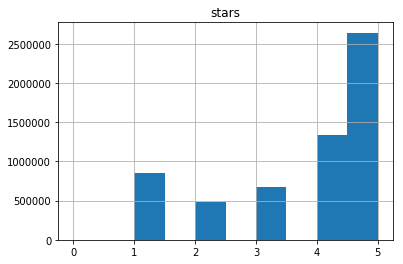

In [15]:
import matplotlib.pyplot as plt
#pd.options.display.mpl_style = 'default'
#data.boxplot()
df.hist()

In [ ]:
df.info()
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.info()

In [16]:
df.stars = np.where(df.stars > 3, 1, 0)

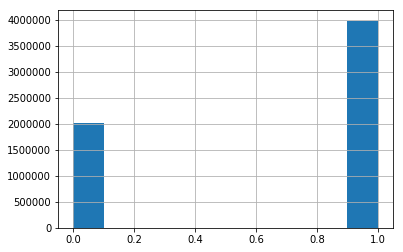

In [17]:
df.stars.hist()

## Reduce the number of elements from 6 million to less than 100,000

In [44]:
df1 = df.sample(100000)

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 2251165 to 1917087
Data columns (total 3 columns):
review_id    100000 non-null object
stars        100000 non-null int32
text         100000 non-null object
dtypes: int32(1), object(2)
memory usage: 2.7+ MB


In [46]:
df1.describe()

,stars
count,100000.000000
mean,0.661630
std,0.473157
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


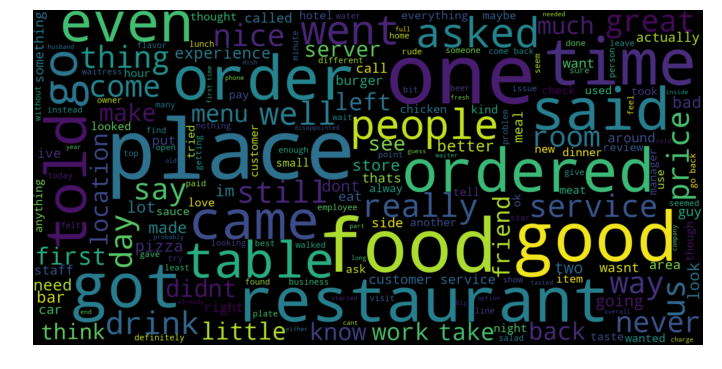

In [21]:
neg_review = df1[df1.stars == 0]
neg_string = []
for t in neg_review.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

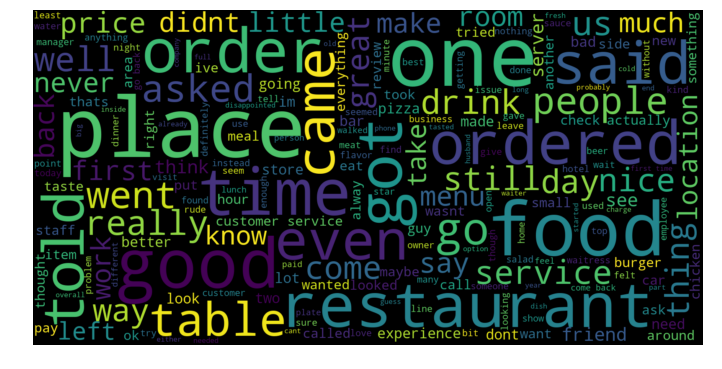

In [22]:
pos_review = df1[df1.stars == 0]
pos_string = []
for t in pos_review.text:
    pos_string.append(t)
pos_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(df1.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [48]:
len(cvec.get_feature_names())

153365

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=5)
cvec.fit(df1.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [50]:
len(cvec.get_feature_names())

26925

In [51]:
neg_doc_matrix = cvec.transform(df1[df1.stars == 0].text)
pos_doc_matrix = cvec.transform(df1[df1.stars == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [52]:
term_freq_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26925 entries, 00 to zur
Data columns (total 2 columns):
0    26925 non-null int64
1    26925 non-null int64
dtypes: int64(2)
memory usage: 631.1+ KB


In [53]:
term_freq_df.head(250)

,0,1
00,7,5
000,182,103
00000,11,4
01,7,16
02,4,16
025,2,4
03,8,7
04,9,11
05,17,18
050,11,9


In [30]:
term_freq_df = term_freq_df[25:]

In [31]:
term_freq_df.head(100)

,0,1
1030am,5,5
1030pm,7,5
104,7,3
1045,3,8
105,5,4
1050,6,1
106,4,4
107,1,5
108,4,3
109,3,2


In [54]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
food,20510,28693,49203
place,17438,31381,48819
good,17087,30819,47906
great,7175,35825,43000
like,16126,19279,35405
service,14375,20549,34924
time,14180,20138,34318
really,9400,16054,25454
got,9156,10632,19788
dont,10056,9122,19178


In [55]:
term_freq_df.sort_values(by='total').iloc[:50]

,negative,positive,total
imma,1,4,5
penchant,0,5,5
articulated,2,3,5
flourish,2,3,5
pennyi,0,5,5
helpfully,3,2,5
thaiger,1,4,5
tgifridays,1,4,5
tge,0,5,5
pepto,3,2,5


In [56]:
len(term_freq_df)

26925

In [57]:
term_freq_df.to_csv('term_freq_df.csv',encoding='utf-8')

Text(0.5,1,'Top 800 tokens in yelp Reviews')

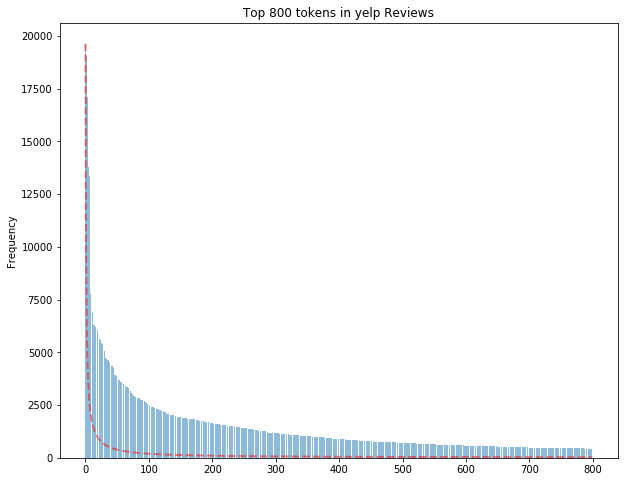

In [36]:
import numpy as np
from pylab import *
y_pos = np.arange(800)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:800], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 800 tokens in yelp Reviews')

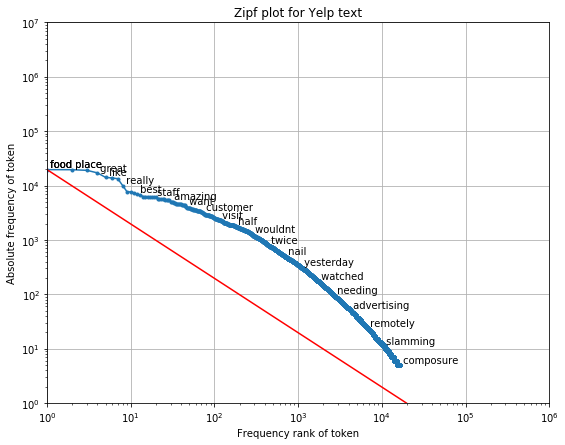

In [37]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(9,7))
plt.ylim(1,10**7)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for Yelp text")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

Text(0.5,1,'Top 50 tokens in negative tweets')

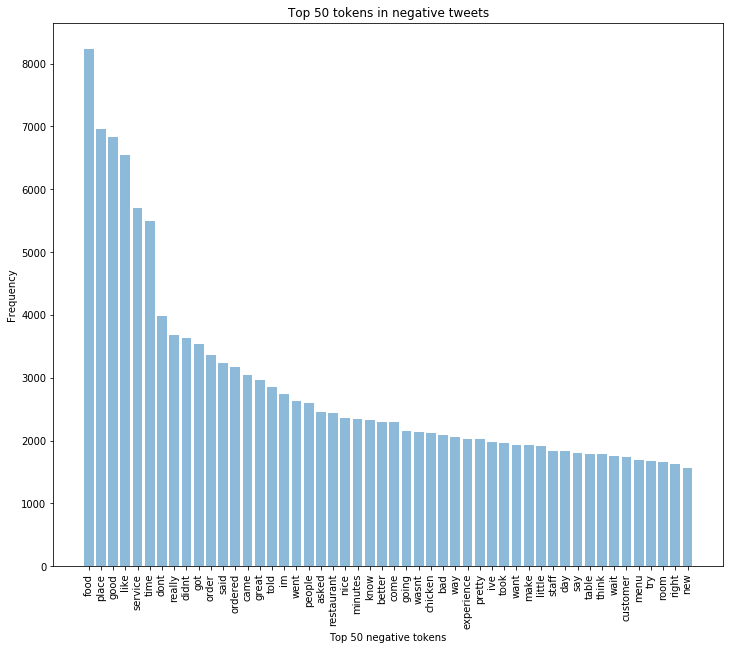

In [38]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5,1,'Top 50 tokens in positive tweets')

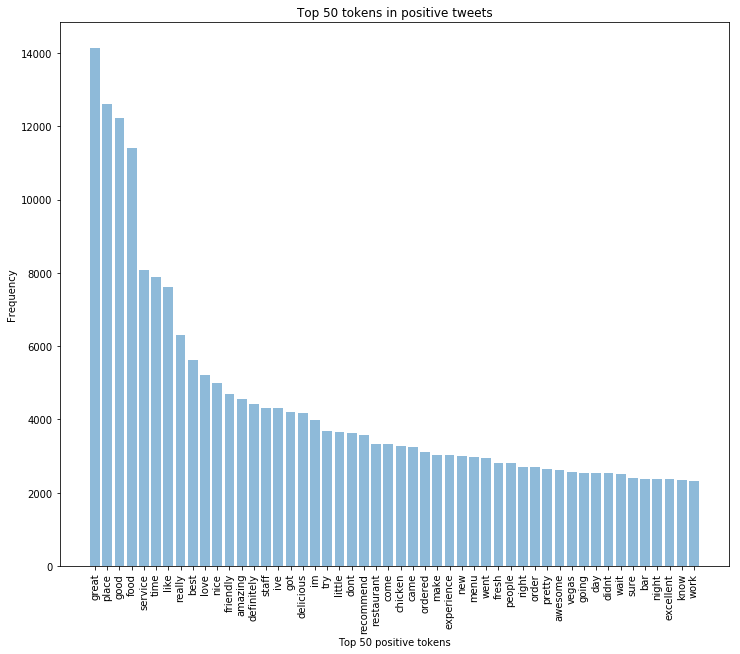

In [39]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

Text(0.5,1,'Negative Frequency vs Positive Frequency')

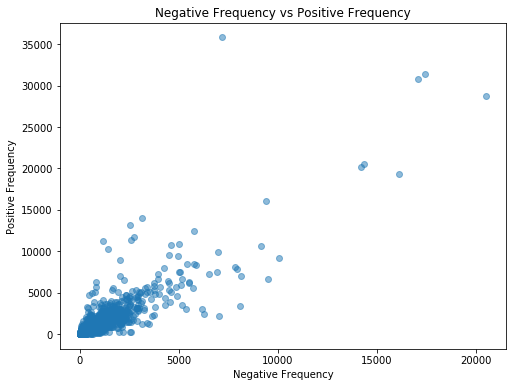

In [58]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [59]:
x = df1.text
y = df1.stars

In [60]:

from sklearn.cross_validation import train_test_split
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.20, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [61]:

print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set has total 80000 entries with 33.62% negative, 66.39% positive
Validation set has total 10000 entries with 34.61% negative, 65.39% positive
Test set has total 10000 entries with 34.84% negative, 65.16% positive


In [ ]:
!pip install textblob

In [67]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
%%time
tbresult = [TextBlob(i).sentiment.polarity for i in x_validation]
tbpred = [0 if n < 0 else 1 for n in tbresult]

In [ ]:
conmat = np.array(confusion_matrix(y_validation, tbpred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['positive', 'negative'],
                         columns=['predicted_positive','predicted_negative'])
print("Accuracy Score: {0:.2f}%".format(accuracy_score(y_validation, tbpred)*100))
print("-"*80)
print("Confusion Matrix\n")
print(confusion)
print("-"*80)
print("Classification Report\n")
print(classification_report(y_validation, tbpred))

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from time import time


In [69]:
import matplotlib.pyplot as plt
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time.time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time.time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    f1Score = f1_score(y_test, y_pred)
    print("The F1 score is: {0:.2f}".format(f1Score))
    print("-"*80)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print("The AUC score is: {0:.2f}".format(auc))
    
    plt.figure()
    
    
    colors = 'aqua'
    
    plt.plot(fpr, tpr, color=colors, lw=2,label='ROC curve of class  (area = {0:.2f})'.format(auc))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for the predictor')
    plt.legend(loc="lower right")
    plt.show()
    
    
    
    
    return accuracy, train_test_time, f1Score, fpr, tpr, auc

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()

lr = LogisticRegression()
n_features = np.arange(18000,27000,2000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time,f1Score, fpr, tpr, auc = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time,f1Score, fpr,tpr, auc))
    return result

In [71]:
from sklearn.pipeline import Pipeline
import time
import datetime

RESULT FOR UNIGRAM without STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 18000 features
null accuracy: 65.39%
accuracy score: 87.92%
model is 22.53% more accurate than null accuracy
train and test time: 13.76s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.86


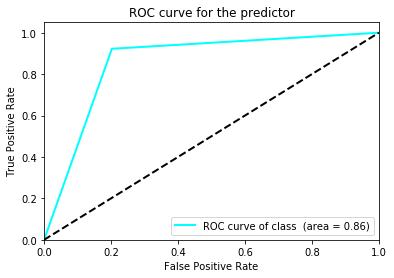

Validation result for 20000 features
null accuracy: 65.39%
accuracy score: 87.97%
model is 22.58% more accurate than null accuracy
train and test time: 16.74s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.86


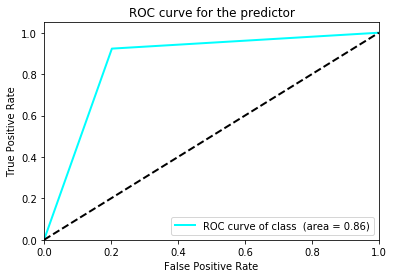

Validation result for 22000 features
null accuracy: 65.39%
accuracy score: 88.04%
model is 22.65% more accurate than null accuracy
train and test time: 18.04s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.86


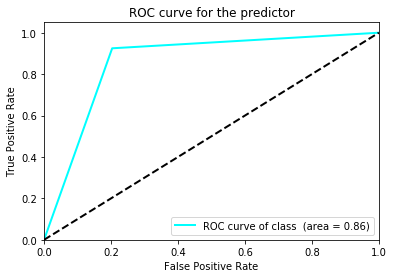

Validation result for 24000 features
null accuracy: 65.39%
accuracy score: 88.07%
model is 22.68% more accurate than null accuracy
train and test time: 19.88s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.86


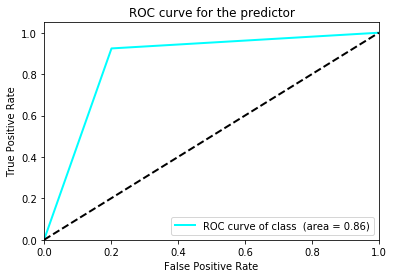

Validation result for 26000 features
null accuracy: 65.39%
accuracy score: 88.11%
model is 22.72% more accurate than null accuracy
train and test time: 16.74s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.86


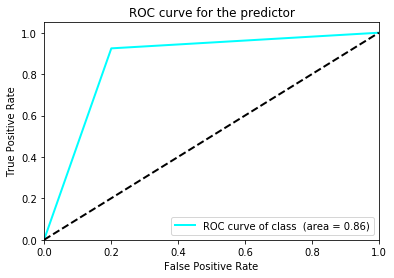

Wall time: 1min 25s


In [72]:
%%time
print("RESULT FOR UNIGRAM without STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker()

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

RESULT FOR UNIGRAM without STOP WORDS (bag of words)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 18000 features
null accuracy: 65.39%
accuracy score: 87.92%
model is 22.53% more accurate than null accuracy
train and test time: 13.09s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.86


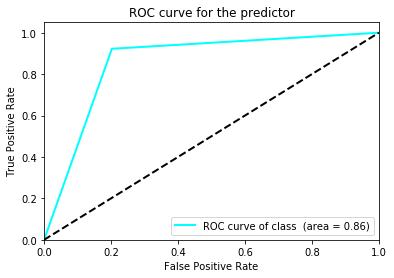

Validation result for 20000 features
null accuracy: 65.39%
accuracy score: 87.97%
model is 22.58% more accurate than null accuracy
train and test time: 16.01s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.86


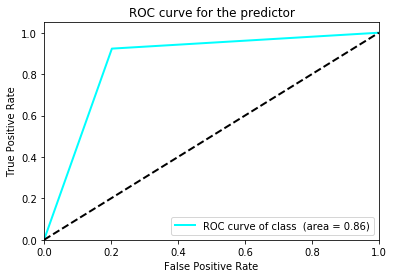

Validation result for 22000 features
null accuracy: 65.39%
accuracy score: 88.04%
model is 22.65% more accurate than null accuracy
train and test time: 16.29s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.86


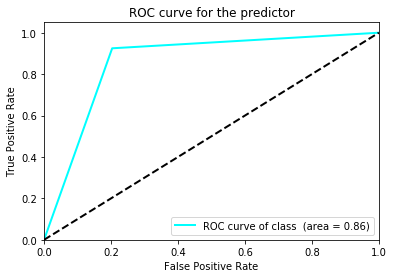

Validation result for 24000 features
null accuracy: 65.39%
accuracy score: 88.07%
model is 22.68% more accurate than null accuracy
train and test time: 18.64s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.86


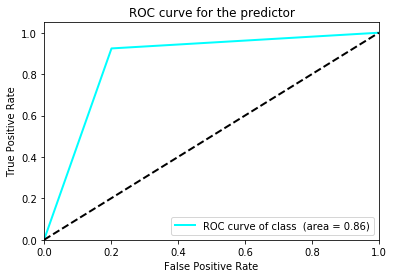

Validation result for 26000 features
null accuracy: 65.39%
accuracy score: 88.11%
model is 22.72% more accurate than null accuracy
train and test time: 16.91s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.86


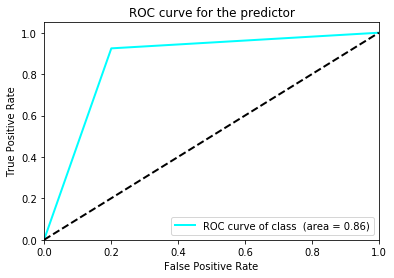

Wall time: 1min 21s


In [74]:
%%time
print("RESULT FOR UNIGRAM without STOP WORDS (bag of words)\n")
feature_result_ug = nfeature_accuracy_checker()

RESULT FOR UNIGRAM WITHOUT STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 18000 features
null accuracy: 65.39%
accuracy score: 88.88%
model is 23.49% more accurate than null accuracy
train and test time: 6.06s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.87


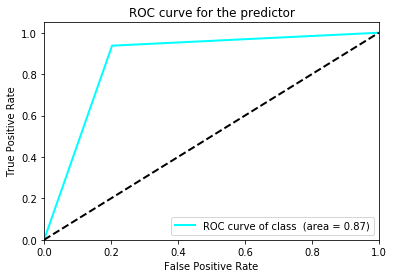

Validation result for 20000 features
null accuracy: 65.39%
accuracy score: 88.90%
model is 23.51% more accurate than null accuracy
train and test time: 5.76s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.87


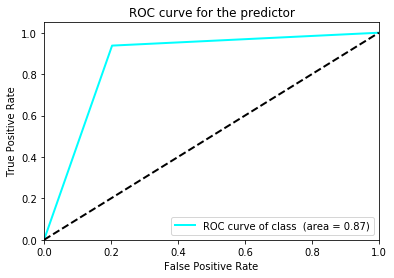

Validation result for 22000 features
null accuracy: 65.39%
accuracy score: 88.89%
model is 23.50% more accurate than null accuracy
train and test time: 5.69s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.87


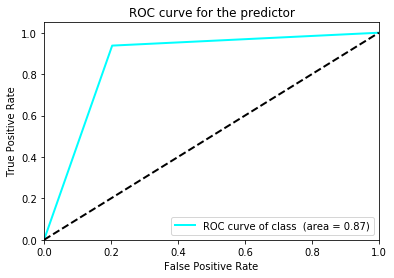

Validation result for 24000 features
null accuracy: 65.39%
accuracy score: 88.87%
model is 23.48% more accurate than null accuracy
train and test time: 5.74s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.87


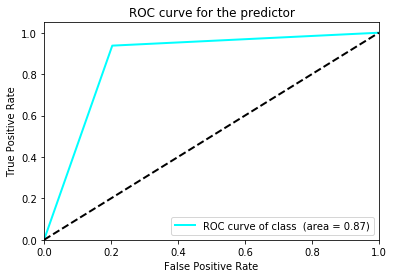

Validation result for 26000 features
null accuracy: 65.39%
accuracy score: 88.87%
model is 23.48% more accurate than null accuracy
train and test time: 5.63s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.87


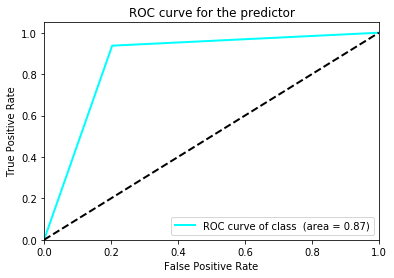

Wall time: 29.4 s


In [75]:
%%time
print("RESULT FOR UNIGRAM WITHOUT STOP WORDS (Tfidf)\n")
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)


RESULT FOR BIGRAM WITHOUT STOP WORDS ()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 18000 features
null accuracy: 65.39%
accuracy score: 88.56%
model is 23.17% more accurate than null accuracy
train and test time: 28.92s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.87


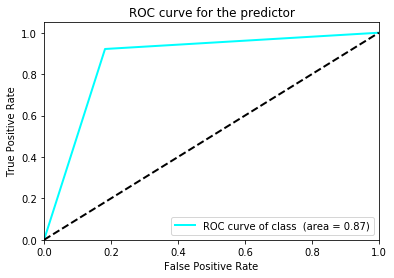

Validation result for 20000 features
null accuracy: 65.39%
accuracy score: 88.50%
model is 23.11% more accurate than null accuracy
train and test time: 28.60s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.87


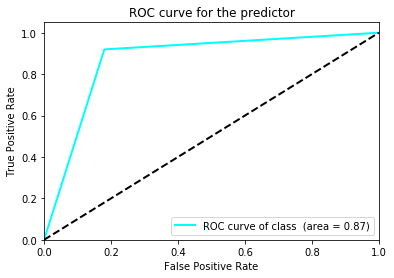

Validation result for 22000 features
null accuracy: 65.39%
accuracy score: 88.50%
model is 23.11% more accurate than null accuracy
train and test time: 33.67s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.87


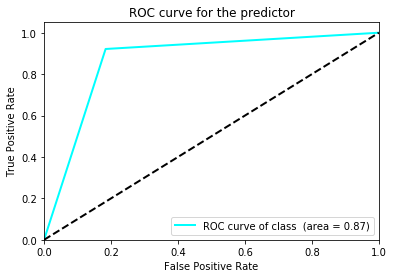

Validation result for 24000 features
null accuracy: 65.39%
accuracy score: 88.55%
model is 23.16% more accurate than null accuracy
train and test time: 29.41s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.87


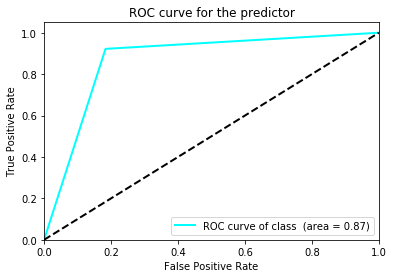

Validation result for 26000 features
null accuracy: 65.39%
accuracy score: 88.73%
model is 23.34% more accurate than null accuracy
train and test time: 30.05s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.87


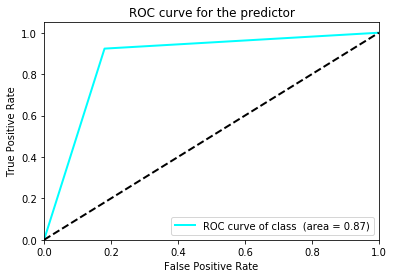

Wall time: 2min 31s


In [76]:
%%time
print("RESULT FOR BIGRAM WITHOUT STOP WORDS ()\n")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))

RESULT FOR BIGRAM WITHOUT STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 18000 features
null accuracy: 65.39%
accuracy score: 89.62%
model is 24.23% more accurate than null accuracy
train and test time: 19.90s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.88


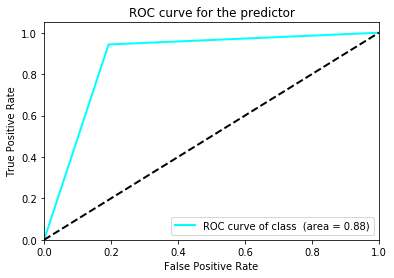

Validation result for 20000 features
null accuracy: 65.39%
accuracy score: 89.59%
model is 24.20% more accurate than null accuracy
train and test time: 19.96s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.87


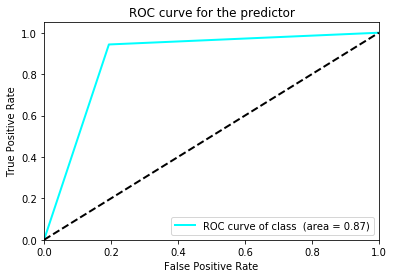

Validation result for 22000 features
null accuracy: 65.39%
accuracy score: 89.68%
model is 24.29% more accurate than null accuracy
train and test time: 20.19s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.88


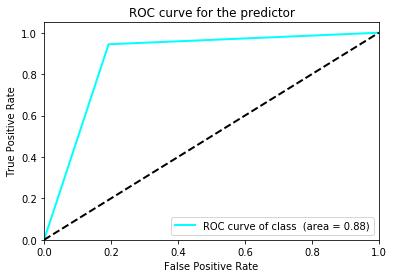

Validation result for 24000 features
null accuracy: 65.39%
accuracy score: 89.67%
model is 24.28% more accurate than null accuracy
train and test time: 20.05s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.88


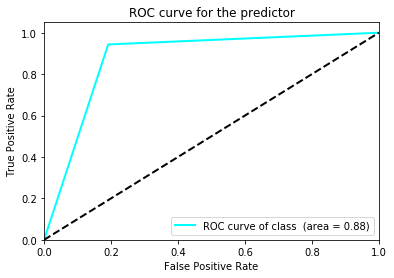

Validation result for 26000 features
null accuracy: 65.39%
accuracy score: 89.67%
model is 24.28% more accurate than null accuracy
train and test time: 20.05s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.88


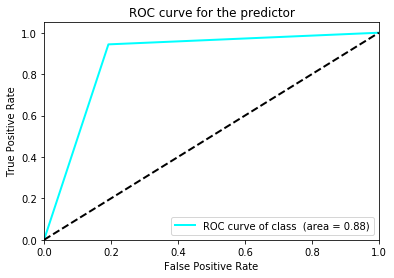

Wall time: 1min 40s


In [77]:
%%time
print("RESULT FOR BIGRAM WITHOUT STOP WORDS (Tfidf)\n")
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))

RESULT FOR TRIGRAM WITH STOP WORDS (bag of words

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 18000 features
null accuracy: 65.39%
accuracy score: 88.56%
model is 23.17% more accurate than null accuracy
train and test time: 53.32s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.87


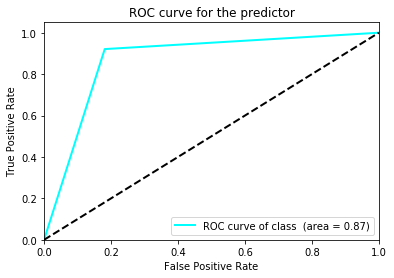

Validation result for 20000 features
null accuracy: 65.39%
accuracy score: 88.67%
model is 23.28% more accurate than null accuracy
train and test time: 53.79s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.87


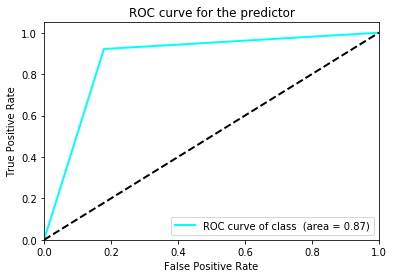

Validation result for 22000 features
null accuracy: 65.39%
accuracy score: 88.48%
model is 23.09% more accurate than null accuracy
train and test time: 55.49s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.87


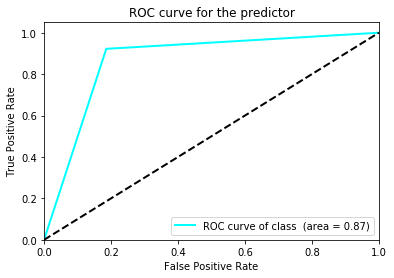

Validation result for 24000 features
null accuracy: 65.39%
accuracy score: 88.58%
model is 23.19% more accurate than null accuracy
train and test time: 55.33s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.87


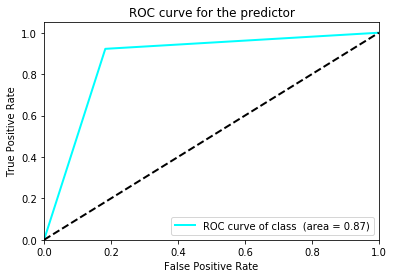

Validation result for 26000 features
null accuracy: 65.39%
accuracy score: 88.70%
model is 23.31% more accurate than null accuracy
train and test time: 52.47s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.87


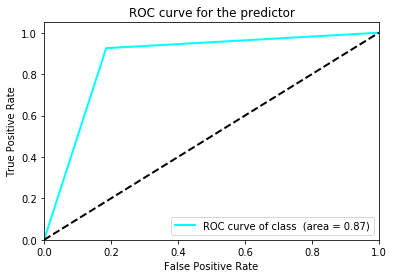

Wall time: 4min 30s


In [78]:
%%time
print("RESULT FOR TRIGRAM WITH STOP WORDS (bag of words\n")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 18000 features
null accuracy: 65.39%
accuracy score: 89.70%
model is 24.31% more accurate than null accuracy
train and test time: 43.49s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.88


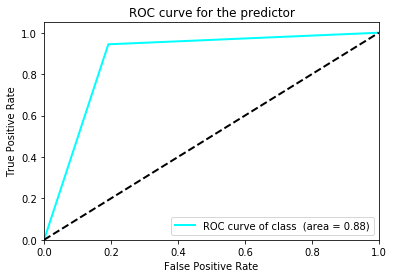

Validation result for 20000 features
null accuracy: 65.39%
accuracy score: 89.62%
model is 24.23% more accurate than null accuracy
train and test time: 44.06s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.88


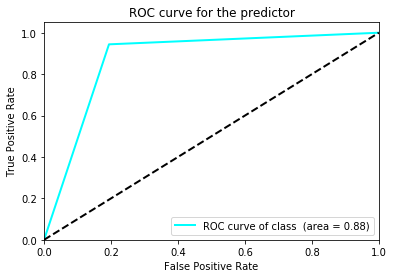

Validation result for 22000 features
null accuracy: 65.39%
accuracy score: 89.61%
model is 24.22% more accurate than null accuracy
train and test time: 44.48s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.87


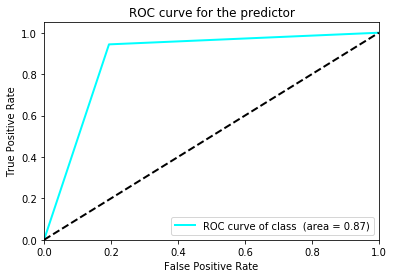

Validation result for 24000 features
null accuracy: 65.39%
accuracy score: 89.68%
model is 24.29% more accurate than null accuracy
train and test time: 42.90s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.88


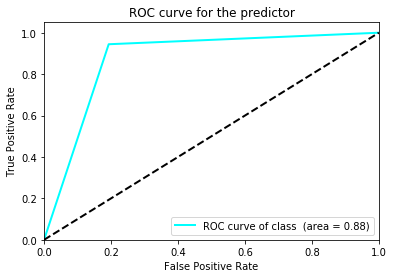

Validation result for 26000 features
null accuracy: 65.39%
accuracy score: 89.66%
model is 24.27% more accurate than null accuracy
train and test time: 42.48s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.88


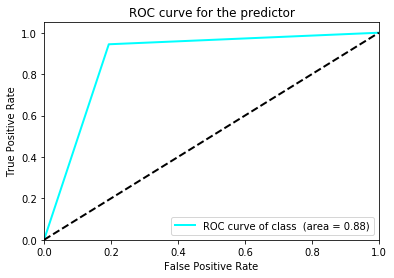

Wall time: 3min 37s


In [79]:
%%time
print("RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))

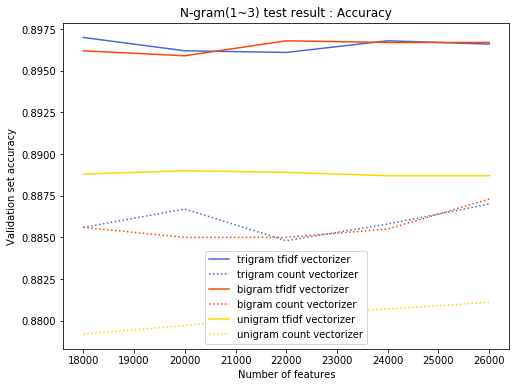

In [81]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time', 'F1', 'FPR', 'TPR', 'AUC' ])
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time', 'F1', 'FPR', 'TPR', 'AUC' ])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time', 'F1', 'FPR', 'TPR', 'AUC' ])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time', 'F1', 'FPR', 'TPR', 'AUC' ])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time', 'F1', 'FPR', 'TPR', 'AUC' ])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time', 'F1', 'FPR', 'TPR', 'AUC' ])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

In [83]:
tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=100000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_accuracy,tt_time, f1Score, fpr, tpr, auc = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        print("appended :", n)
        result.append((n,clf_accuracy,tt_time, f1Score, fpr, tpr, auc))
    return result

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
null accuracy: 65.39%
accuracy score: 89.64%
model is 24.25% more accurate than null accuracy
train and test time: 42.51s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.87


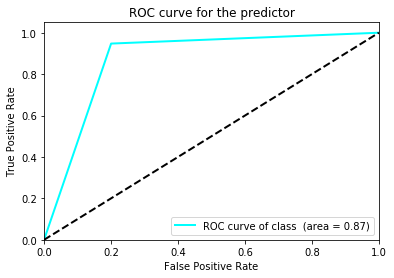

appended : Logistic Regression
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
null accuracy: 65.39%
accuracy score: 89.78%
model is 24.39% more accurate than null accuracy
train and test time: 43.08s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.88


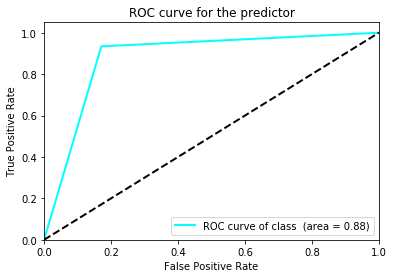

appended : Linear SVC
Validation result for LinearSVC with L1-based feature selection
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
        norm_order=1, prefit...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
null accuracy: 65.39%
accuracy score: 89.99%
model is 24.60% more accurate than null accuracy
train and test time: 50.98s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.88


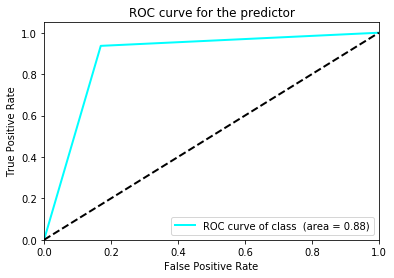

appended : LinearSVC with L1-based feature selection
Validation result for Multinomial NB
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
null accuracy: 65.39%
accuracy score: 87.05%
model is 21.66% more accurate than null accuracy
train and test time: 44.04s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.83


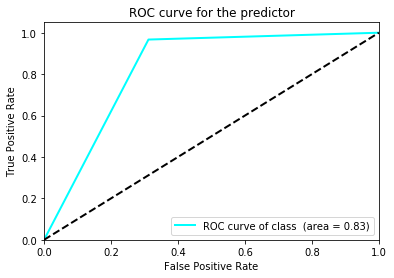

appended : Multinomial NB
Validation result for Bernoulli NB
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
null accuracy: 65.39%
accuracy score: 81.59%
model is 16.20% more accurate than null accuracy
train and test time: 42.69s
--------------------------------------------------------------------------------
The F1 score is: 0.86
--------------------------------------------------------------------------------
The AUC score is: 0.78


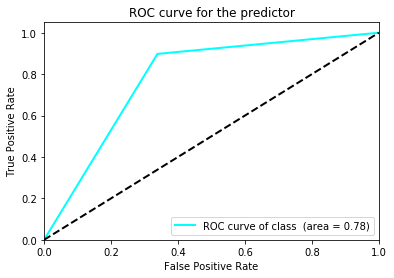

appended : Bernoulli NB
Validation result for Ridge Classifier
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
null accuracy: 65.39%
accuracy score: 89.79%
model is 24.40% more accurate than null accuracy
train and test time: 44.61s
--------------------------------------------------------------------------------
The F1 score is: 0.92
--------------------------------------------------------------------------------
The AUC score is: 0.88


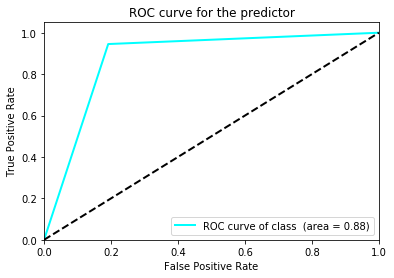

appended : Ridge Classifier
Validation result for AdaBoost
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
null accuracy: 65.39%
accuracy score: 82.55%
model is 17.16% more accurate than null accuracy
train and test time: 74.84s
--------------------------------------------------------------------------------
The F1 score is: 0.87
--------------------------------------------------------------------------------
The AUC score is: 0.79


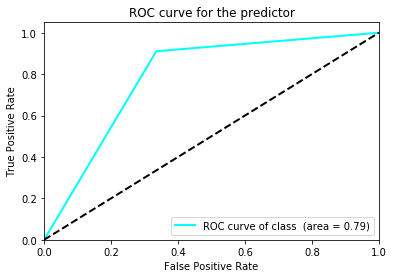

appended : AdaBoost
Validation result for Perceptron
Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)


C:\Users\adadw\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


null accuracy: 65.39%
accuracy score: 87.74%
model is 22.35% more accurate than null accuracy
train and test time: 43.14s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.86


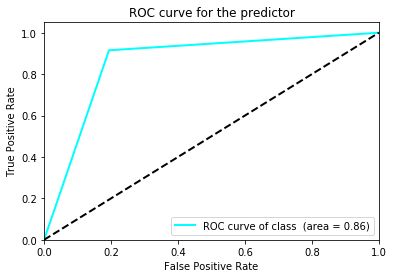

appended : Perceptron
Validation result for Passive-Aggresive
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              fit_intercept=True, loss='hinge', max_iter=None, n_iter=None,
              n_jobs=1, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False)


C:\Users\adadw\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


null accuracy: 65.39%
accuracy score: 88.76%
model is 23.37% more accurate than null accuracy
train and test time: 42.57s
--------------------------------------------------------------------------------
The F1 score is: 0.91
--------------------------------------------------------------------------------
The AUC score is: 0.87


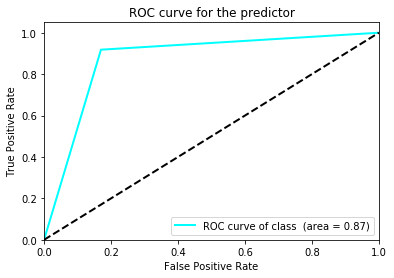

appended : Passive-Aggresive
Validation result for Nearest Centroid
NearestCentroid(metric='euclidean', shrink_threshold=None)
null accuracy: 65.39%
accuracy score: 82.01%
model is 16.62% more accurate than null accuracy
train and test time: 42.71s
--------------------------------------------------------------------------------
The F1 score is: 0.86
--------------------------------------------------------------------------------
The AUC score is: 0.82


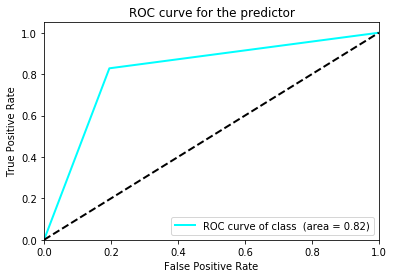

appended : Nearest Centroid
Wall time: 7min 52s


In [84]:
%%time
trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,3))

In [ ]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = LinearSVC()
clf3 = MultinomialNB()
clf4 = RidgeClassifier()
clf5 = PassiveAggressiveClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4), ('pac', clf5)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['Logistic Regression', 'Linear SVC', 'Multinomial NB', 'Ridge Classifier', 'Passive Aggresive Classifier', 'Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(max_features=100000,ngram_range=(1, 3))),
            ('classifier', clf)
        ])
    print("Validation result for {}".format(label))
    print(clf)
    clf_accuracy,tt_time, fpr, tpr, auc = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)

In [ ]:
%%time
trigram_result = classifier_comparator(n_features=30000,ngram_range=(1,3))


In [85]:
len(trigram_result)

10

In [86]:
trigram_result

[('Logistic Regression',
  0.8964,
  42.51141309738159,
  0.922847780756628,
  array([0.        , 0.20023115, 1.        ]),
  array([0.       , 0.9475455, 1.       ]),
  0.8736571745929641),
 ('Linear SVC',
  0.8978,
  43.07501411437988,
  0.922809667673716,
  array([0.        , 0.17104883, 1.        ]),
  array([0.        , 0.93424071, 1.        ]),
  0.8815959398853253),
 ('LinearSVC with L1-based feature selection',
  0.8999,
  50.98474168777466,
  0.9244471280851385,
  array([0.        , 0.16931523, 1.        ]),
  array([0.        , 0.93653464, 1.        ]),
  0.8836097057554214),
 ('Multinomial NB',
  0.8705,
  44.044286012649536,
  0.9071085287999427,
  array([0.        , 0.31175961, 1.        ]),
  array([0.        , 0.96696743, 1.        ]),
  0.8276039095809867),
 ('Bernoulli NB',
  0.8159,
  42.685011863708496,
  0.8644429717988367,
  array([0.        , 0.33863045, 1.        ]),
  array([0.        , 0.89769078, 1.        ]),
  0.7795301623901822),
 ('Ridge Classifier',
  0.8

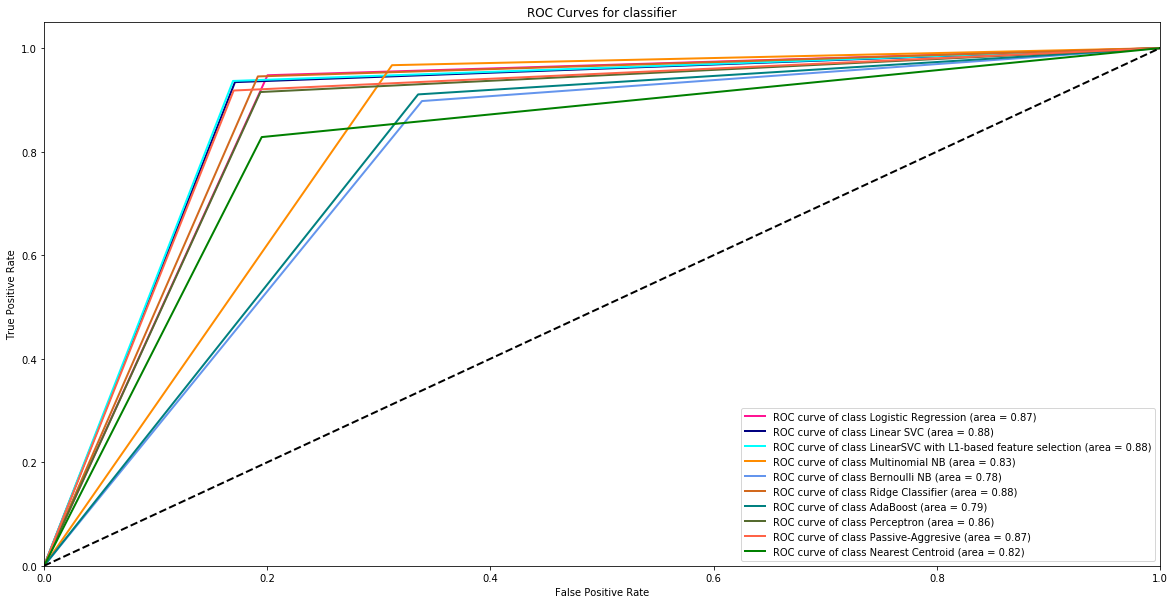

In [91]:
plotAllGraph(trigram_result)

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
def plotAllGraph(trigram_result):
    plt.figure(figsize=(20,10))
    
    colors = cycle(['deeppink','navy','aqua', 'darkorange', 'cornflowerblue', 'chocolate','teal','darkolivegreen','tomato', 'green'])
    for i, color in zip(range(0,10), colors):
        auc = trigram_result[i][6]
        plt.plot(trigram_result[i][4], trigram_result[i][5], color=color, lw=2, 
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(trigram_result[i][0],trigram_result[i][6]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for classifier')
    plt.legend(loc="lower right")
    plt.show()

In [92]:
import pandas as pd

df=pd.DataFrame(trigram_result, columns=['Classifier', 'PredictionAccuracy','ProcessingTime', 'F1Score', 'FPR', 'TPR', 'AUC'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
Classifier            10 non-null object
PredictionAccuracy    10 non-null float64
ProcessingTime        10 non-null float64
F1Score               10 non-null float64
FPR                   10 non-null object
TPR                   10 non-null object
AUC                   10 non-null float64
dtypes: float64(4), object(3)
memory usage: 640.0+ bytes


In [93]:
df

,Classifier,PredictionAccuracy,ProcessingTime,F1Score,FPR,TPR,AUC
0,Logistic Regression,0.8964,42.511413,0.922848,"[0.0, 0.2002311470673216, 1.0]","[0.0, 0.9475454962532497, 1.0]",0.873657
1,Linear SVC,0.8978,43.075014,0.922810,"[0.0, 0.17104882981797168, 1.0]","[0.0, 0.9342407095886222, 1.0]",0.881596
2,LinearSVC with L1-based feature selection,0.8999,50.984742,0.924447,"[0.0, 0.1693152268130598, 1.0]","[0.0, 0.9365346383239027, 1.0]",0.883610
3,Multinomial NB,0.8705,44.044286,0.907109,"[0.0, 0.31175960704998557, 1.0]","[0.0, 0.966967426211959, 1.0]",0.827604
4,Bernoulli NB,0.8159,42.685012,0.864443,"[0.0, 0.3386304536261196, 1.0]","[0.0, 0.8976907784064841, 1.0]",0.779530
5,Ridge Classifier,0.8979,44.614531,0.923709,"[0.0, 0.1915631320427622, 1.0]","[0.0, 0.9452515675179691, 1.0]",0.876844
6,AdaBoost,0.8255,74.835155,0.872189,"[0.0, 0.33516324761629585, 1.0]","[0.0, 0.9105367793240556, 1.0]",0.787687
7,Perceptron,0.8774,43.143698,0.907079,"[0.0, 0.19387460271597803, 1.0]","[0.0, 0.9151246367946169, 1.0]",0.860625
8,Passive-Aggresive,0.8876,42.565243,0.914395,"[0.0, 0.16989309448136378, 1.0]","[0.0, 0.9180302798593057, 1.0]",0.874069
9,Nearest Centroid,0.8201,42.713248,0.857550,"[0.0, 0.19503033805258596, 1.0]","[0.0, 0.8281082734363052, 1.0]",0.816539


In [131]:

newdf = pd.DataFrame(df, columns=['Classifier', 'PredictionAccuracy', 'F1Score', 'AUC','ProcessingTime' ])

newdf

,Classifier,PredictionAccuracy,F1Score,AUC,ProcessingTime
0,Logistic Regression,0.8964,0.922848,0.873657,42.511413
1,Linear SVC,0.8978,0.922810,0.881596,43.075014
2,LinearSVC with L1-based feature selection,0.8999,0.924447,0.883610,50.984742
3,Multinomial NB,0.8705,0.907109,0.827604,44.044286
4,Bernoulli NB,0.8159,0.864443,0.779530,42.685012
5,Ridge Classifier,0.8979,0.923709,0.876844,44.614531
6,AdaBoost,0.8255,0.872189,0.787687,74.835155
7,Perceptron,0.8774,0.907079,0.860625,43.143698
8,Passive-Aggresive,0.8876,0.914395,0.874069,42.565243
9,Nearest Centroid,0.8201,0.857550,0.816539,42.713248


In [132]:
newdf.sort_values('F1Score', ascending=False)

,Classifier,PredictionAccuracy,F1Score,AUC,ProcessingTime
2,LinearSVC with L1-based feature selection,0.8999,0.924447,0.883610,50.984742
5,Ridge Classifier,0.8979,0.923709,0.876844,44.614531
0,Logistic Regression,0.8964,0.922848,0.873657,42.511413
1,Linear SVC,0.8978,0.922810,0.881596,43.075014
8,Passive-Aggresive,0.8876,0.914395,0.874069,42.565243
3,Multinomial NB,0.8705,0.907109,0.827604,44.044286
7,Perceptron,0.8774,0.907079,0.860625,43.143698
6,AdaBoost,0.8255,0.872189,0.787687,74.835155
4,Bernoulli NB,0.8159,0.864443,0.779530,42.685012
9,Nearest Centroid,0.8201,0.857550,0.816539,42.713248


In [124]:
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.palettes import brewer

source = ColumnDataSource(data=dict(PredictionAccuracy=df['PredictionAccuracy'],
                                    ProcessingTime=df['ProcessingTime'],
                                    F1Score=df['F1Score'],
                                    AUC=df['AUC'],
                                    Classifier=df['Classifier']))

p = figure()
p.plot_height=600
p.plot_width=1000
p.scatter(x='PredictionAccuracy', y='ProcessingTime', size=8, source=source)
p.xaxis[0].axis_label = 'PredictionAccuracy'
p.yaxis[0].axis_label = 'ProcessingTime'

labels = LabelSet(x='PredictionAccuracy', y='ProcessingTime', text='Classifier', level='glyph',
              x_offset=5, y_offset=5, source=source, render_mode='canvas')
p.add_layout(labels)
show(p)

In [106]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
output_notebook()
color_mapper = LinearColorMapper(palette='Blues8', low=min(df.PredictionAccuracy), high=max(df.PredictionAccuracy))
p = figure(x_axis_label='Prediction Accuracy', y_axis_label='ProcessingTime')
p.circle('PredictionAccuracy','ProcessingTime',size=5,alpha=0.3,source=df,color="blue")
from bokeh.models import HoverTool
hover = HoverTool(tooltips=[('Classifier','@Classifier')])
p.add_tools(hover)
show(p)

Loading BokehJS ...

In [126]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
output_notebook()
color_mapper = LinearColorMapper(palette='Inferno256', low=min(df.AUC), high=max(df.AUC))
p = figure(x_axis_label='F1 Score', y_axis_label='AUC')
p.circle('F1Score','AUC',size=5,alpha=0.3,source=df,color="blue")
from bokeh.models import HoverTool
hover = HoverTool(tooltips=[('Classifier','@Classifier')])
p.add_tools(hover)
show(p)

Loading BokehJS ...